<a href="https://colab.research.google.com/github/ryonce/Daily-Projects/blob/main/Classification_Tree_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classifcation Tree Models


## Data and Split

In [1]:
# Imports

import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Import data

df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vSyzKH3nFAiPSB6OkLTjDwFlTWO_Lw904LoqljKmHbnrh4ROtS0SFF3SHMGz6HSdPeaB4LBC8nE1_rG/pub?output=csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
# Assign the M and B for 0 & 1

df['diagnosis'] = df['diagnosis'].replace({'M': 0, 'B': 1,})

In [4]:
# Arrange Data into a Features Matrix and Target Vector.

y = df['diagnosis']
X = df.drop(columns = 'diagnosis')

In [5]:
# Train Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## Decision Classifier

In [6]:
# Name the model and fit it to the data

dec_tree = DecisionTreeClassifier()

dec_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [7]:
# Calculate classification accuracy

train_score = dec_tree.score(X_train, y_train)
test_score = dec_tree.score(X_test, y_test)

print(f'Train score for Decision Tree: {train_score}')
print(f'Test score for Decision Tree: {test_score}')

Train score for Decision Tree: 1.0
Test score for Decision Tree: 0.9440559440559441


## Bagging Classifier

In [8]:
# Name the model and fit it to the data

bag_tree = BaggingClassifier()

bag_tree.fit(X_train, y_train)

BaggingClassifier()

In [9]:
# Calculate classification accuracy

train_score = bag_tree.score(X_train, y_train)
test_score = bag_tree.score(X_test, y_test)

print(f'Train score for Bagging Tree: {train_score}')
print(f'Test score for Bagging Tree: {test_score}')

Train score for Bagging Tree: 0.9976525821596244
Test score for Bagging Tree: 0.958041958041958


## Random Forests

In [10]:
# Name the model and fit it to the data

rf_tree = RandomForestClassifier()

rf_tree.fit(X_train, y_train)

RandomForestClassifier()

In [11]:
# Calculate classification accuracy

train_score = rf_tree.score(X_train, y_train)
test_score = rf_tree.score(X_test, y_test)

print(f'Train score for Random Forest Tree: {train_score}')
print(f'Test score for Random Forest Tree: {test_score}')

Train score for Random Forest Tree: 1.0
Test score for Random Forest Tree: 0.965034965034965


 - The best model based on the data is the Random Forest Tree model with:
    - Test score of .965

# Plotting Confusion Matrix Exercise

In [12]:
from sklearn.metrics import ConfusionMatrixDisplay

What was the accuracy of the model? (You should have already determined this for the classification tree exercise)

  - Decision Tree: 94.4%
  - Bagging Tree: 95.8%
  - Random Forest: 96.5%

Which condition (Malignant or Benign) is considered the positive class in this data set?

  - Malignant is the positive class as 0

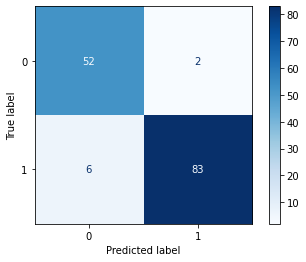

In [14]:
ConfusionMatrixDisplay.from_estimator(dec_tree, X_test, y_test, cmap = 'Blues');

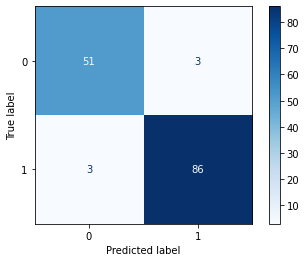

In [15]:
ConfusionMatrixDisplay.from_estimator(bag_tree, X_test, y_test, cmap = 'Blues');

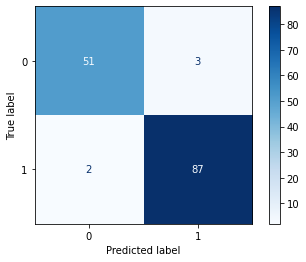

In [13]:
ConfusionMatrixDisplay.from_estimator(rf_tree, X_test, y_test, cmap = 'Blues');


How many false positives were there?

 - 3

How many false negatives were there?
 - 2

For the breast cancer data set, which do you think is more problematic: false positives or false negatives? Explain.

  - I think a False Negative would be problematic as it would go untreated